In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import optuna
from tqdm import tqdm

In [3]:
diabetes_df = pd.read_csv('./datasets/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[
    ['Glucose',
     'BloodPressure',
     'SkinThickness',
     'Insulin',
     'BMI']] = diabetes_df_copy[
        ['Glucose',
         'BloodPressure',
         'SkinThickness',
         'Insulin',
         'BMI']].replace(0,np.NaN)

In [10]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


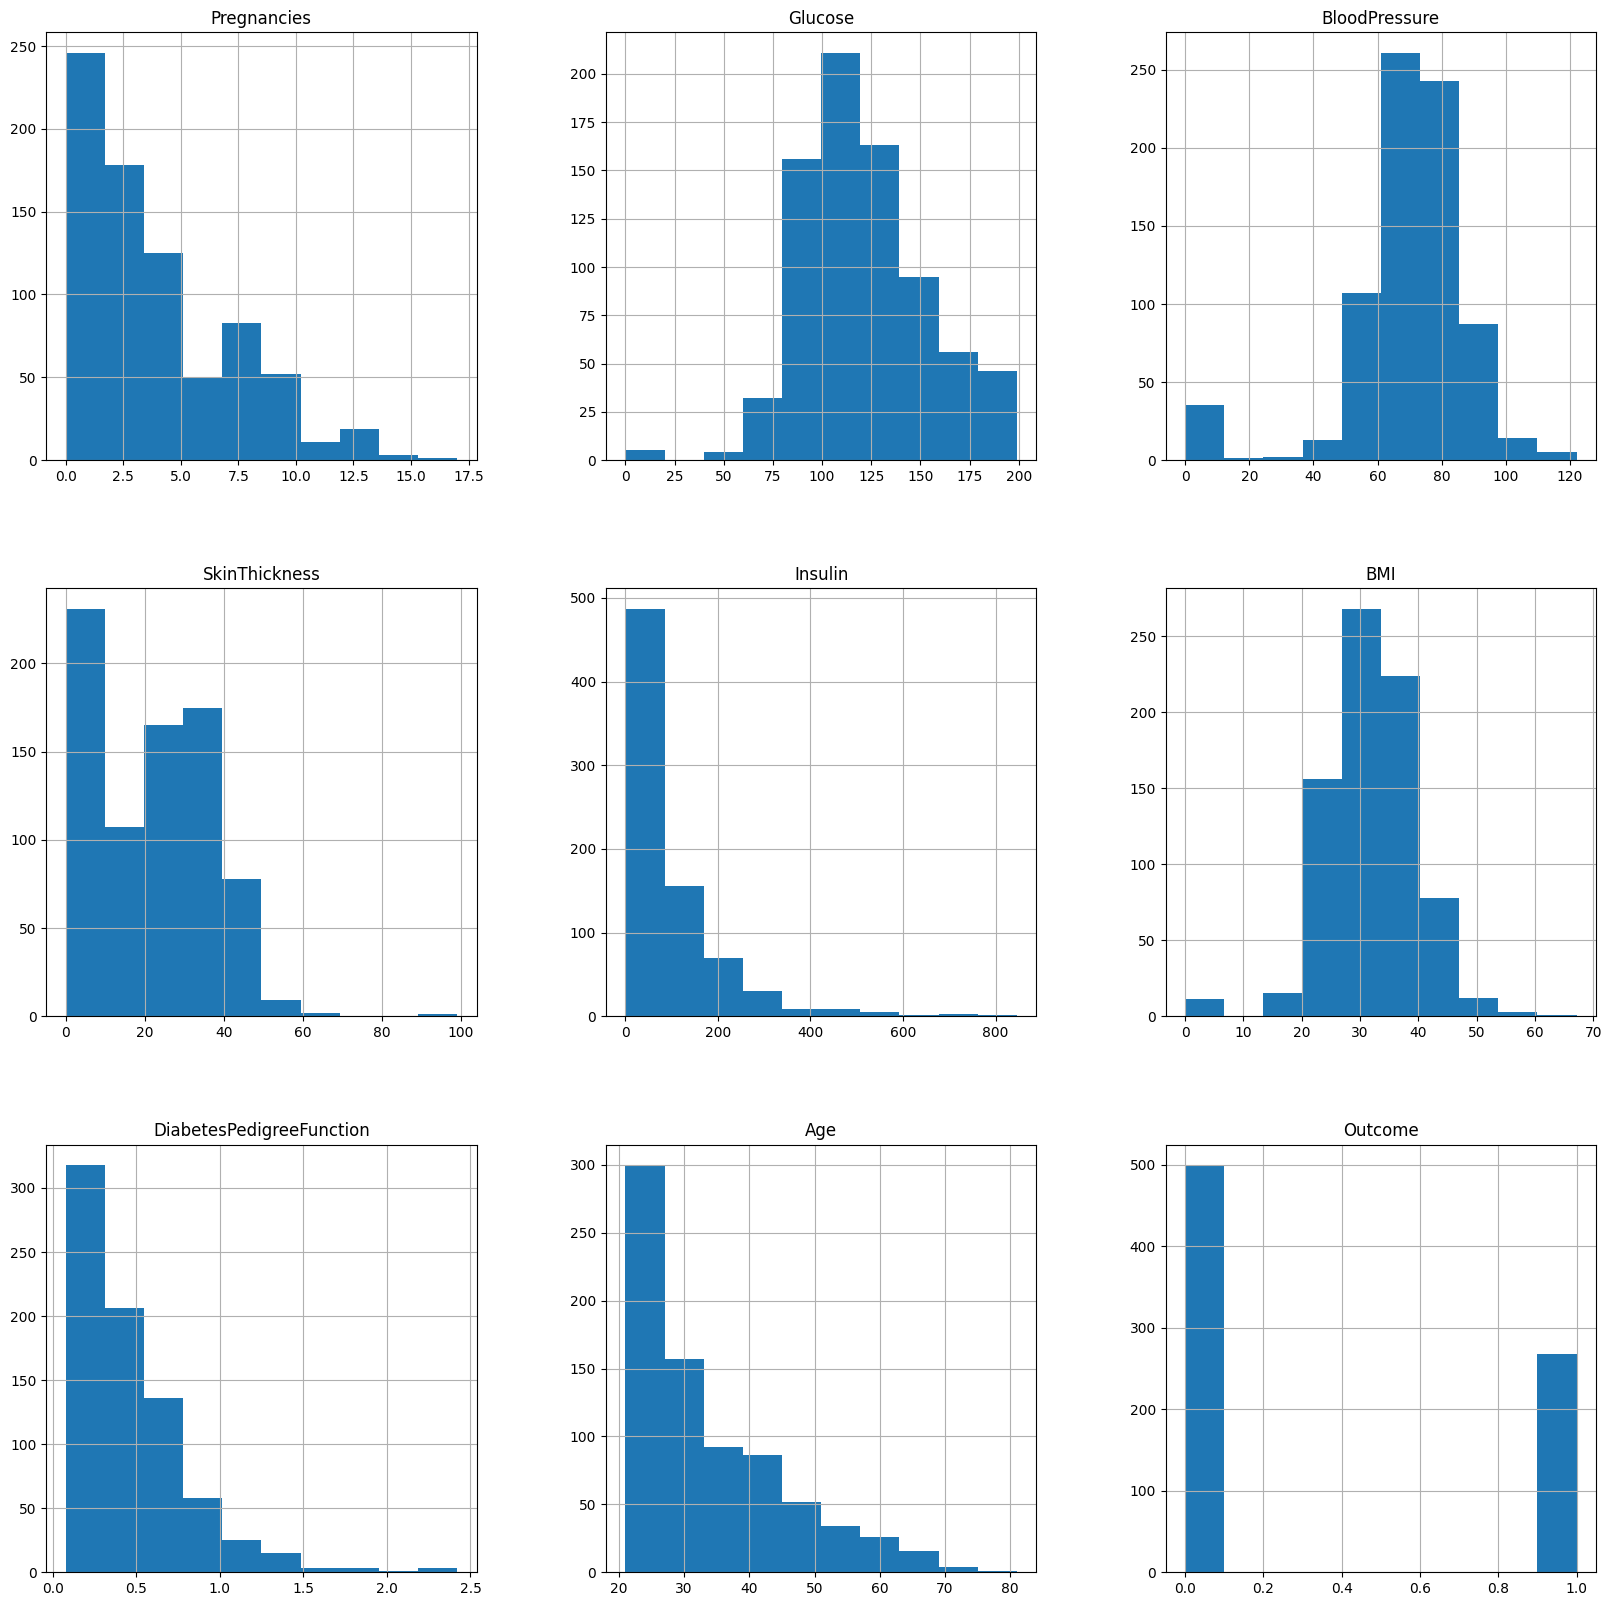

In [11]:
p = diabetes_df.hist(figsize = (20,20))

In [12]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

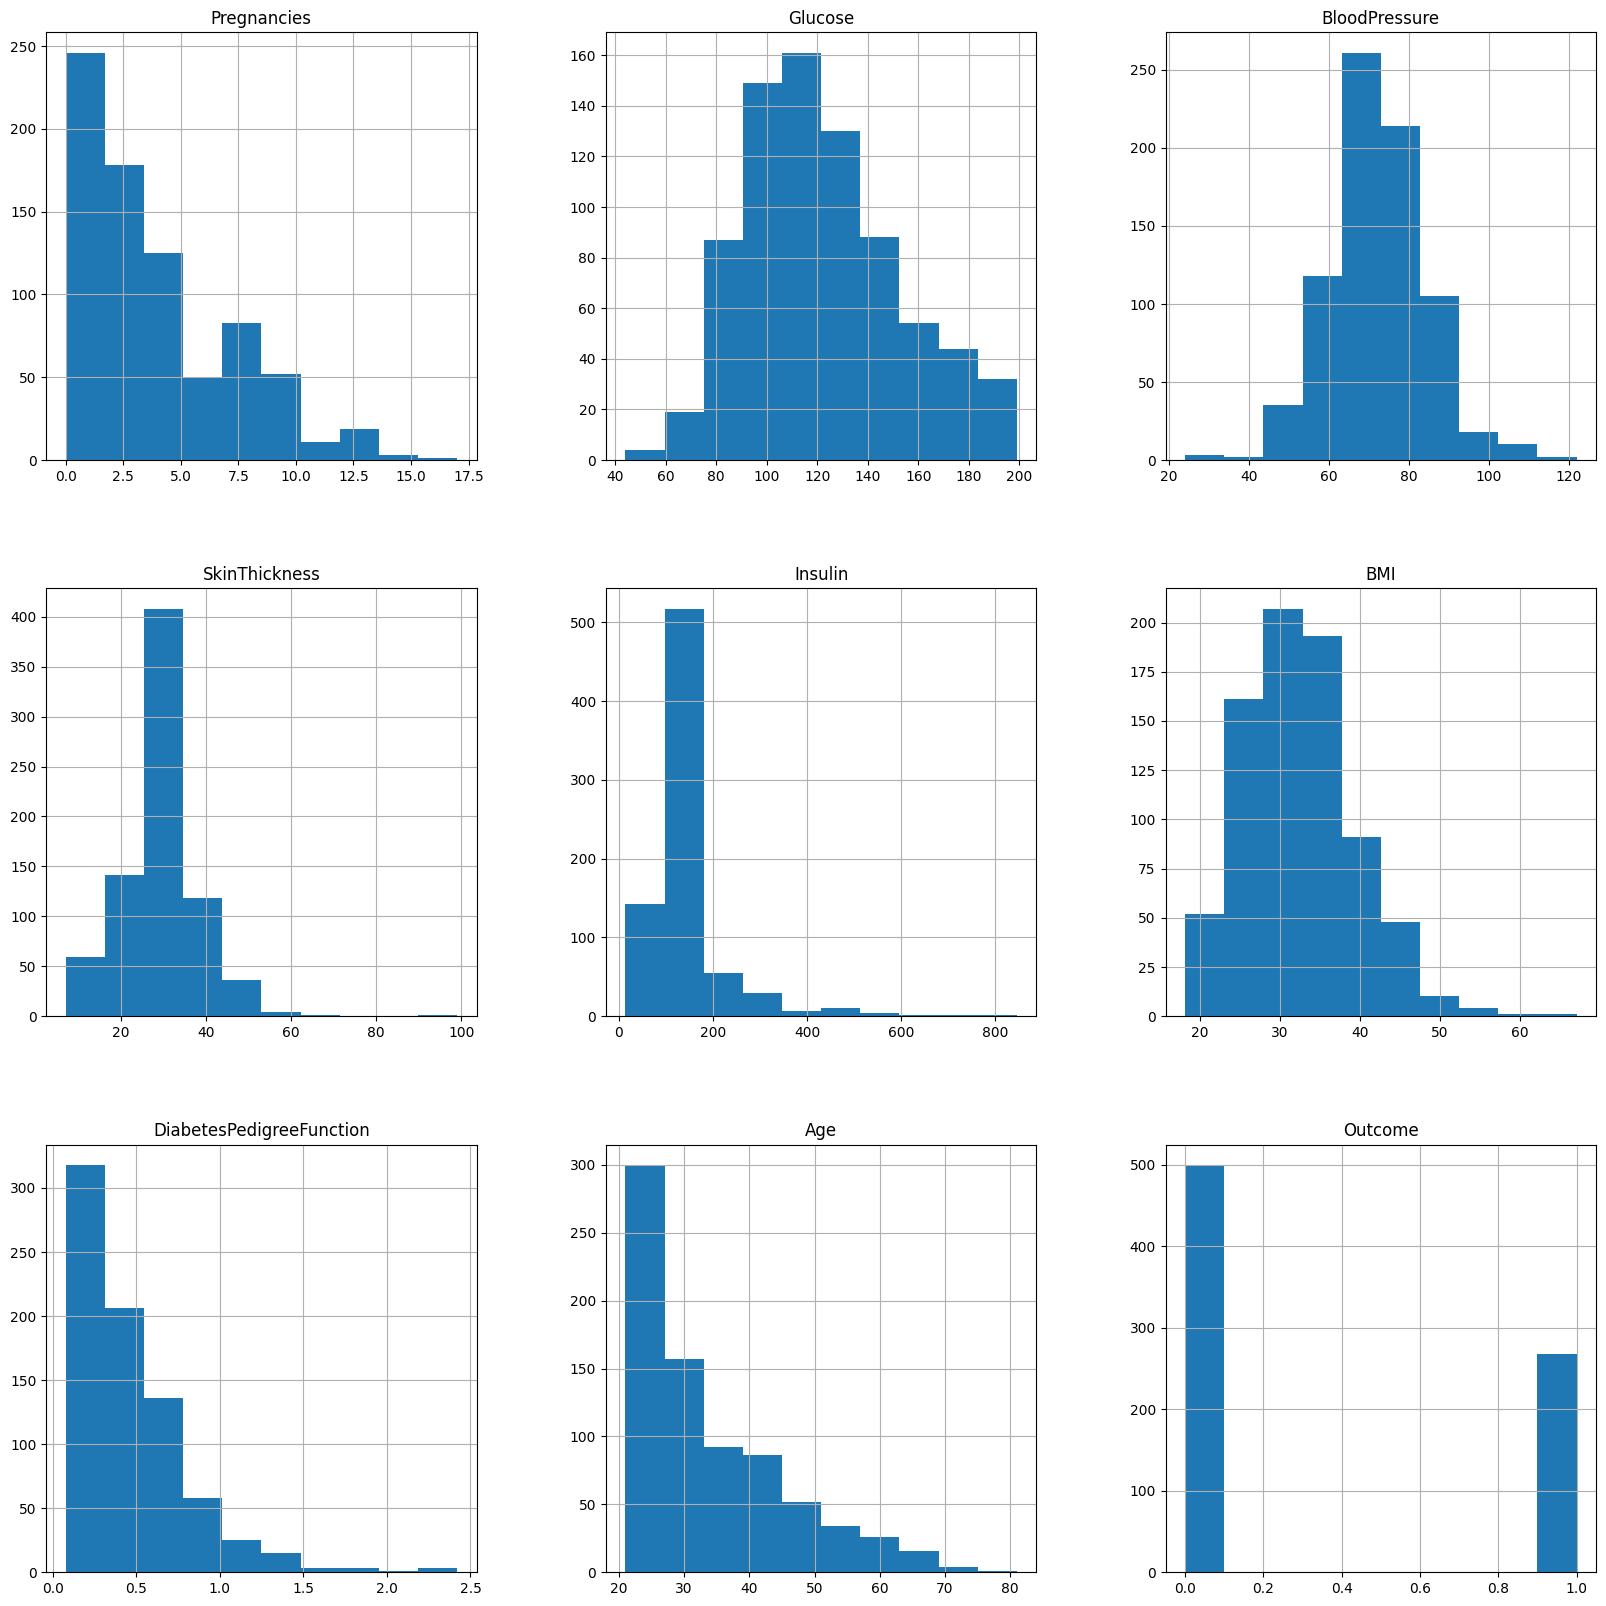

In [13]:
p = diabetes_df_copy.hist(figsize = (20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


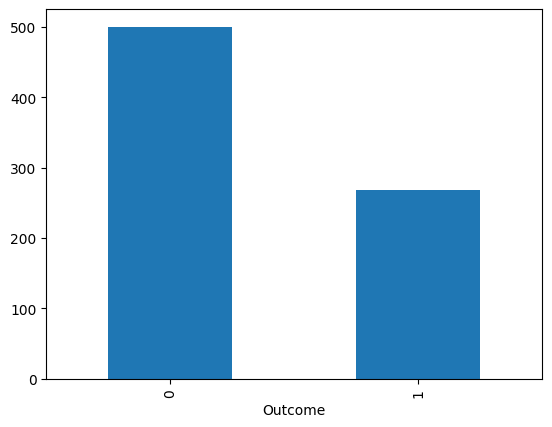

In [14]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hammam\AppData\Local\Temp\ipykernel_13100\1587213579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

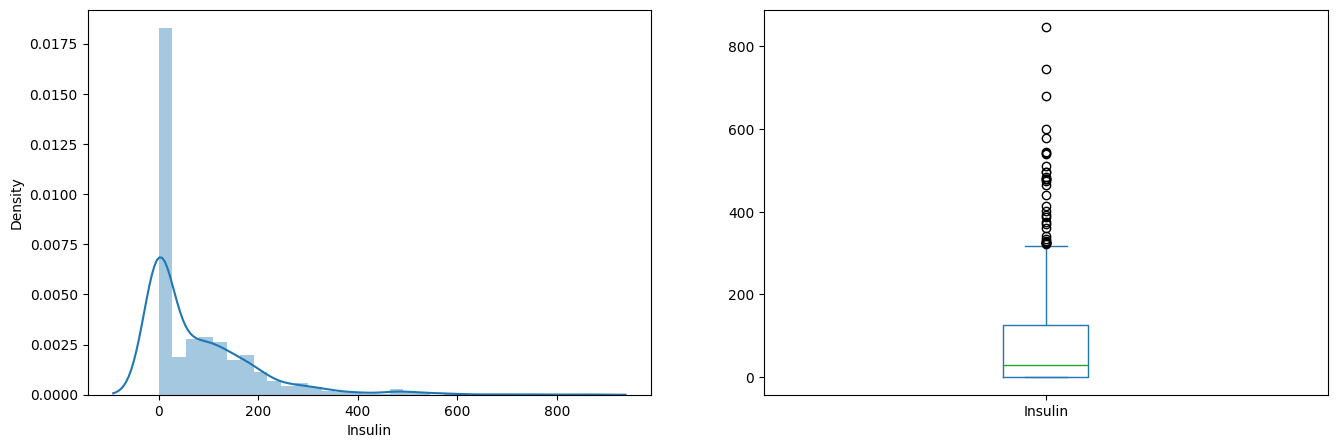

In [16]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

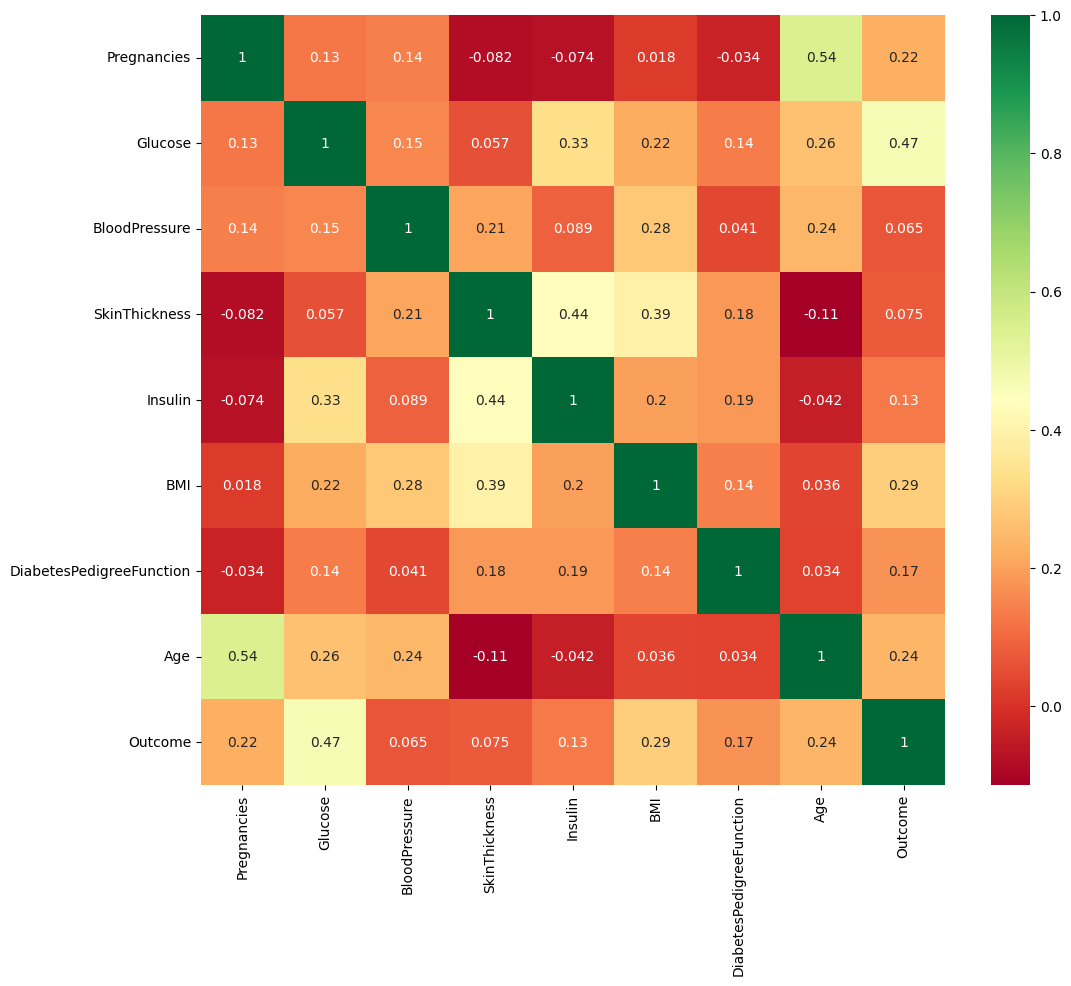

In [17]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [18]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
X = diabetes_df_copy.drop(columns=['Outcome']).values
y = diabetes_df_copy['Outcome'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [22]:
class DiabetesModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [23]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

In [24]:
def evaluate(model, data_loader, criterion, metric_fn):
    model.eval()
    running_loss = 0.0
    running_metric = 0.0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().view(-1, 1))
            running_loss += loss.item()
            predictions = (outputs >= 0.5).float()
            metric = metric_fn(predictions, labels)
            running_metric += metric
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return running_loss / len(data_loader), running_metric / len(data_loader), all_predictions, all_labels

In [25]:
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define a function to create and train the model with hyperparameters
def objective(trial):
    input_size = X_train.shape[1]
    hidden_size = trial.suggest_int('hidden_size', 16, 128)
    output_size = 1
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)

    model = DiabetesModel(input_size, hidden_size, output_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    num_epochs = 100
    best_accuracy = 0.0

    for epoch in tqdm(range(num_epochs)):
        train_loss = train(model, train_loader, optimizer, criterion)

        _, accuracy, _, _ = evaluate(model, train_loader, criterion, accuracy_score)

        if accuracy > best_accuracy:
            best_accuracy = accuracy

    _, test_accuracy, test_predictions, test_labels = evaluate(model, test_loader, criterion, accuracy_score)
    recall = recall_score(test_labels, test_predictions)

    return -test_accuracy  # Negative because Optuna aims to minimize

In [26]:
# Create a study and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-10-19 12:02:19,359] A new study created in memory with name: no-name-faa1cd4d-30e0-4437-8554-b99d395a04ec
C:\Users\Hammam\AppData\Local\Temp\ipykernel_13100\3017595126.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
100%|██████████| 100/100 [00:14<00:00,  6.91it/s]
[I 2023-10-19 12:02:35,106] Trial 0 finished with value: -0.6495192307692308 and parameters: {'hidden_size': 103, 'lr': 0.0008786759209658257}. Best is trial 0 with value: -0.6495192307692308.
C:\Users\Hammam\AppData\Local\Temp\ipykernel_13100\3017595126.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-

In [27]:
# Get the best hyperparameters
best_params = study.best_params

In [28]:
best_model = DiabetesModel(X_train.shape[1], best_params['hidden_size'], 1)
best_optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])
best_criterion = nn.BCELoss()
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [29]:
for epoch in tqdm(range(100)):
    train_loss = train(best_model, train_loader, best_optimizer, best_criterion)

100%|██████████| 100/100 [00:06<00:00, 16.24it/s]


In [30]:
best_loss, best_accuracy, best_predictions, best_labels = evaluate(best_model, test_loader, best_criterion, accuracy_score)
best_recall = recall_score(best_labels, best_predictions)

In [31]:
print("Best Hyperparameters:", best_params)
print("Best Test Accuracy:", best_accuracy)
print("Best Test Recall:", best_recall)

Best Hyperparameters: {'hidden_size': 18, 'lr': 0.006165430613730611}
Best Test Accuracy: 0.7413461538461539
Best Test Recall: 0.45454545454545453


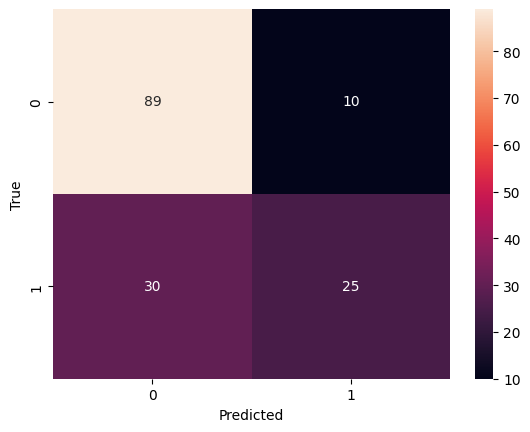

In [32]:
confusion = confusion_matrix(best_labels, best_predictions)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()